In [1]:
import aoc
import numpy as np
from scipy.ndimage import convolve
import math
import re
import itertools
from functools import reduce
import networkx as nx
import matplotlib.pyplot as plt

# Day 1

In [23]:
raw_data = aoc.get_data(2020,1)

In [28]:
raw_data

'408\n1614\n1321\n1028\n1018\n2008\n1061\n1433\n1434\n1383\n1645\n1841\n1594\n1218\n1729\n1908\n1237\n1152\n1771\n1837\n1709\n1449\n1876\n1763\n1676\n1491\n1983\n1743\n1845\n999\n1478\n1929\n1819\n1385\n1308\n1703\n1246\n1831\n1964\n1469\n1977\n1488\n1698\n1640\n1513\n1136\n1794\n1685\n1802\n1520\n1807\n1654\n1547\n1917\n1792\n1949\n1268\n1626\n1493\n1534\n1700\n1844\n1146\n1049\n1811\n1627\n1630\n1755\n1887\n1290\n1446\n1968\n168\n1749\n1479\n1651\n1646\n1839\n14\n1918\n1568\n1554\n1926\n1942\n1862\n1966\n1536\n1599\n1439\n1766\n1643\n1045\n1537\n1786\n1596\n1954\n1390\n1981\n1362\n1292\n1573\n1541\n1515\n1567\n1860\n1066\n1879\n1800\n1309\n1533\n1812\n1774\n1119\n1602\n1677\n482\n1054\n1424\n1631\n1829\n1550\n1636\n1604\n185\n1642\n1304\n1843\n1773\n1667\n1530\n1047\n1584\n1958\n1160\n1570\n1705\n1582\n1692\n1886\n1673\n1842\n1402\n1517\n1805\n1386\n1165\n1867\n1153\n1467\n1473\n1803\n1967\n1485\n1448\n1922\n1258\n1590\n1996\n1208\n1241\n1412\n1610\n1219\n523\n1813\n1123\n1916\n1861\

In [31]:
data = list(map(int, raw_data.splitlines()))

## Functionalized & Self Documenting Style

In [35]:
def is_valid(combination, target=2020):

    """check if the sum of combination values equals the target value"""

    return sum(combination) == target

def cumulative_product(combination):

    """calculate the cumulative product of a combination values"""

    return reduce(lambda first,second: first * second, combination)


def build_expense_combinations(expenses, number_in_combination=2):

    """build a list of all possible expense combinations from the expenses by the number elements in a combination"""
    
    return itertools.combinations(expenses, number_in_combination)


def fix_expense_report(expenses, number_in_combination=2):

    """iterate through the list of unique expense combinations, find the combination that sums to the valid value and return the cumulative product of the combination"""

    expense_combinations = build_expense_combinations(expenses, number_in_combination)
    
    for expense_combination in expense_combinations:

        if is_valid(expense_combination):
            return cumulative_product(expense_combination)


print(f"part 1 solution {fix_expense_report(data, 2)}\npart 2 solution {fix_expense_report(data, 3)}")

part 1 solution 996075
part 2 solution 51810360


## Don't Repeat Yorself

In [36]:
def fix_expense_report(expenses, number_in_combination=2):

    """iterate through the list of unique expense combinations, find the combination that sums to the valid value and return the cumulative product of the combination"""

    # generate all combinations from the expenses
    expense_combinations = itertools.combinations(expenses, number_in_combination)
    
    for expense_combination in expense_combinations:

        # check to see if the combination matches the requirement
        if sum(expense_combination) == 2020:

            # return the product of the combinations
            return  reduce(lambda first,second: first * second, expense_combination)


print(f"part 1 solution {fix_expense_report(data, 2)}\npart 2 solution {fix_expense_report(data, 3)}")

part 1 solution 996075
part 2 solution 51810360


## One Liner

In [37]:
[reduce(lambda a,b: a*b, [x for x in itertools.combinations(data, z) if sum(x) == 2020][0]) for z in [2,3]]

[996075, 51810360]

# Day 3

In [ ]:
raw_data = aoc.get_data(2020, 3)

In [ ]:
data = raw_data.replace('.', '0').replace('#', '1').splitlines()

In [ ]:
data

In [ ]:
patch = np.array([[int(y) for y in x] for x in data])

In [ ]:
slope = (3, 1)

In [ ]:
def make_forest(patch, slope):
    
    shape = patch.shape
    
    max_down = shape[0] * slope[1]
    
    max_right = max_down * slope[0]
    
    return np.concatenate([patch] * math.ceil(max_right / shape[1]), axis=1)

In [ ]:
forest = make_forest(patch, (1, 3))

In [ ]:
forest.shape

In [ ]:
def count_trees(forest, slope):
    
    x = 0
    y = 0
    
    trees = []
    
    while True:
        try: 
            x += slope[0]
            y += slope[1]
        
            trees.append(forest[y, x])
        except IndexError:
            break
    
    return sum(trees)

In [ ]:
count_trees(forest, slope)

# Day 4

In [ ]:
raw_data = aoc.get_data(2020, 4)

data = raw_data.split('\n\n')

# Functional Approach

required_fields = {'byr', 'iyr', 'eyr' ,'hgt' ,'hcl' ,'ecl', 'pid' }

def reject_or_accept_passport(passport):
    
    fields = passport.replace(' ', '\n').splitlines()
    
    document = dict()
    
    for field in fields:
    
        field_name, value = field.split(':')
        
        document[field_name] = value
    
    if set(document.keys()).intersection(required_fields) == required_fields:
        
        return document

sum([x is not None for x in map(reject_or_accept_passport, data)])

def valid_between(value, low, high):
    
    value = int(value)
    
    return low <= value <= high


def valid_height(value):

    if re.search('\d*in', value) is not None:
        
        return valid_between(value[:-2], 59, 76)
    
    elif re.search('\d*cm', value) is not None:
        
        return valid_between(value[:-2], 150, 193)
        
    else:
        return False

def valid_hair(value):

    return re.search('#[0-9a-f]{6}', value) is not None

def valid_eye(value):

    return value in {'amb', 'blu', 'brn', 'gry', 'grn', 'hzl', 'oth'}

def valid_passport_number(value):
    
    return re.search('^\d{9}$', value) is not None

    
def validate_passport(passport):
    
    document = reject_or_accept_passport(passport)
    
    if document:
        
        return all([
            valid_between(document['byr'], 1920, 2002),
            valid_between(document['iyr'], 2010, 2020),
            valid_between(document['eyr'], 2020, 2030),
            valid_height(document['hgt']),
            valid_hair(document['hcl']), 
            valid_eye(document['ecl']), 
            valid_passport_number(document['pid'])])
    else:
        return False

sum(map(validate_passport, data))

# Object Oriented Approach

class Passport:

    required_fields = required_fields
    
    def __init__(self, passport_string):

        fields = passport_string.replace(' ', '\n').splitlines()

        for field in fields:

            field_name, field_value = field.split(':')
            
            setattr(self, field_name, field_value)
    

    def has_required_fields(self):

        return all([getattr(self, field, False) for field in self.required_fields])

    @staticmethod
    def is_valid_between(value, low, high):
        
        value = int(value)
        
        return low <= value <= high
    
    
    def is_valid_height(self):

        height = re.match('(\d*)(cm|in)', self.hgt)

        if height is None:
            return False
            
        value, unit = height[1], height[2]
        
        if unit == 'in':
            return self.is_valid_between(value, 59, 76)
        
        else:
            
            return self.is_valid_between(value, 150, 193)

    def is_valid_birth_year(self):

        return self.is_valid_between(self.byr, 1920, 2002)

    def is_valid_issue_year(self):

        return self.is_valid_between(self.iyr, 2010, 2020)
        
    def is_valid_expiration_year(self):
        return self.is_valid_between(self.eyr, 2020, 2030)
    
    def is_valid_hair_color(self):
    
        return re.match('^#[0-9a-f]{6}$', self.hcl) is not None
    
    def is_valid_eye_color(self):
    
        return self.ecl in {'amb', 'blu', 'brn', 'gry', 'grn', 'hzl', 'oth'}


    def is_valid_passport_number(self):

        return re.match('^\d{9}$', self.pid) is not None

    def is_valid(self):

        if not self.has_required_fields():
            return False
        
        return all([
            self.is_valid_passport_number(), 
            self.is_valid_hair_color(), 
            self.is_valid_eye_color(), 
            self.is_valid_height(), 
            self.is_valid_birth_year(),
            self.is_valid_issue_year(),
            self.is_valid_expiration_year()
        ])

passports = [Passport(passport_data) for passport_data in data]

sum([passport.has_required_fields() for passport in passports])

sum([passport.is_valid() for passport in passports])

# Day 5

In [10]:
raw_data = aoc.get_data(2020, 5)

In [11]:
data = raw_data.splitlines()

In [12]:
def search(string, array, low):
    
    array_length = len(array)
    
    if array_length == 1:
        return array[0]
    
    comparitor = [*string].pop(0)
    
    if comparitor == low:
        
        return search(string[1:], array[: array_length//2], low)
    else:
        
        return search(string[1:], array[array_length//2:], low)

In [13]:
def get_seat(code):
    
    row_code = code[:-3]
    col_code = code[-3:]
    
    row = search(row_code, list(range(128)), 'F')
    col = search(col_code, list(range(8)), 'L')
    
    return row * 8 + col
    

In [14]:
seats = set(map(get_seat, data))

In [15]:
max(seats)

806

In [16]:
all_seats = set(range(min(seats), max(seats)))

In [17]:
all_seats.difference(seats)

{562}

In [24]:
def boarding_pass_to_int(boardingpass):

    return int(boardingpass.replace('F','0').replace('B', '1').replace('L', '0').replace('R', '1'), base=2)

In [31]:
seats = set(map(boarding_pass_to_int, data))

In [32]:
max(seats)

806

In [34]:
myseat = set(range(min(seats), max(seats))).difference(seats)
myseat

{562}

# Day 6 

In [ ]:
raw_data = aoc.get_data(2020, 6)

In [ ]:
data = raw_data.split('\n\n')

In [ ]:
def count_unique_questions(group):
    
    return len(set(group.replace('\n', '')))

In [ ]:
sum(map(count_unique_questions, data))

In [ ]:
def count_common_questions(group):
    
    people = [set(x) for x in group.splitlines()]
    
    return len(reduce(lambda a,b: a.intersection(b) , people))

In [ ]:
sum(map(count_common_questions, data))

# Day 7

In [3]:
raw_data = aoc.get_data(2020,7)

In [4]:
data = raw_data.splitlines()

In [5]:
target = 'shiny gold'

In [28]:
def construct_rule_network(rules):
    
    graph = nx.DiGraph()
    
    for rule in rules:
        
        color = re.findall('^(.*?)\sbags?', rule)
        
        contents = re.findall('\d+\s(.*?)\sbags?', rule)
    
        if contents:
            
            graph.add_edges_from(zip(color*len(contents), contents))
        
        
    return graph
    

In [29]:
graph = construct_rule_network(data)

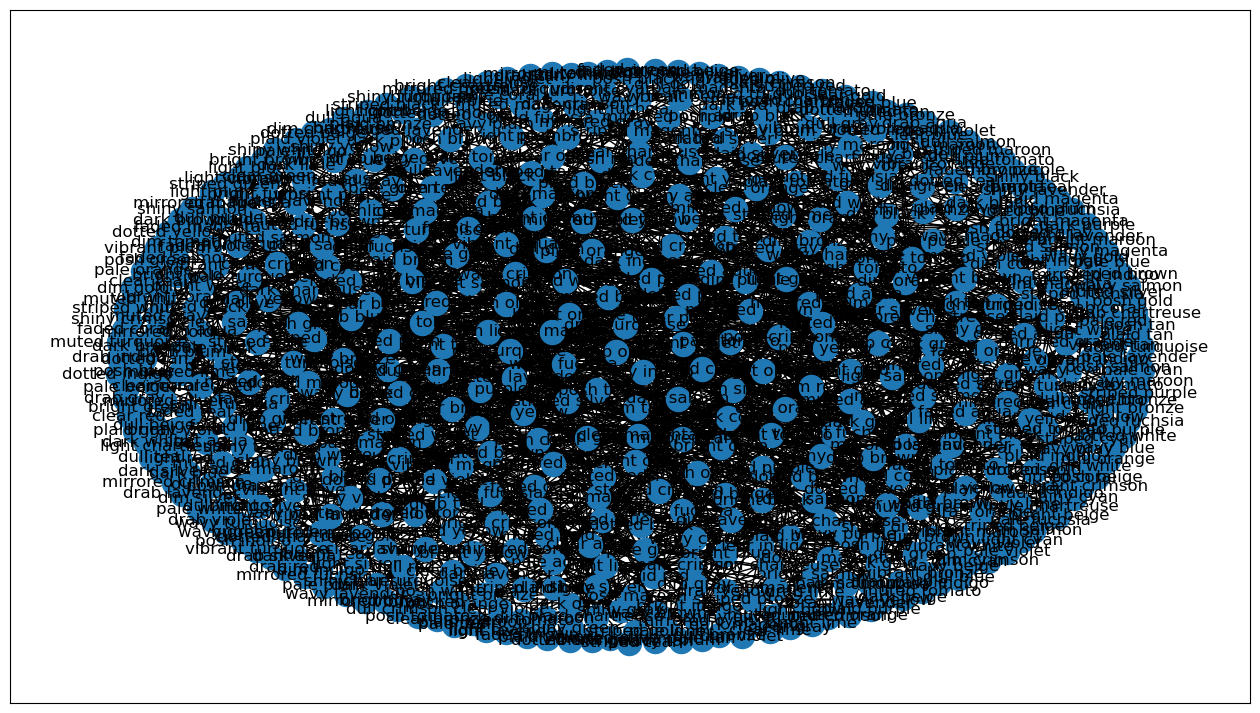

In [30]:
pos = nx.arf_layout(graph)

fig, ax = plt.subplots(figsize=(16,9))
nx.draw_networkx(graph, pos, ax=ax)

In [31]:
sub_graph = graph.subgraph(filter(lambda x: nx.has_path(graph, x, target), graph.nodes))

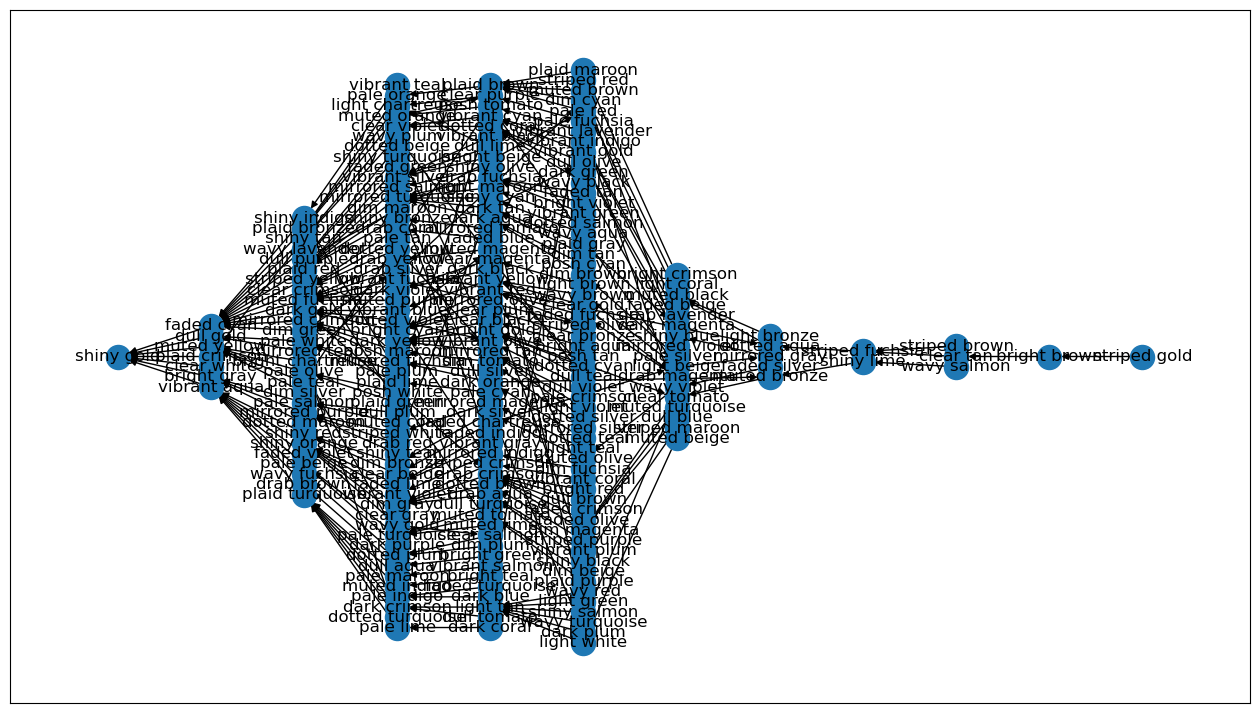

In [32]:
pos = nx.bfs_layout(sub_graph.reverse(), target)

fig, ax = plt.subplots(figsize=(16,9))
nx.draw_networkx(sub_graph, pos, ax=ax)
plt.show()

In [34]:
len(sub_graph.nodes) - 1 

229

In [44]:
def construct_weighted_rule_network(rules):
    
    g = nx.DiGraph()
    
    for rule in rules:
        
        color = re.findall('^(.*?)\sbags?', rule)
        
        contents = re.findall('\d+\s(.*?)\sbags?', rule)
        
        number = map(int, re.findall('(\d+)\s.*?\sbags?', rule))
    
        if contents:
            
            g.add_weighted_edges_from(zip(color*len(contents), contents, number))
        
        
    return g

In [45]:
graph = construct_weighted_rule_network(data)

In [46]:
decendents = nx.descendants(graph, target)

decendents.add(target)

sub_graph = graph.subgraph(decendents)

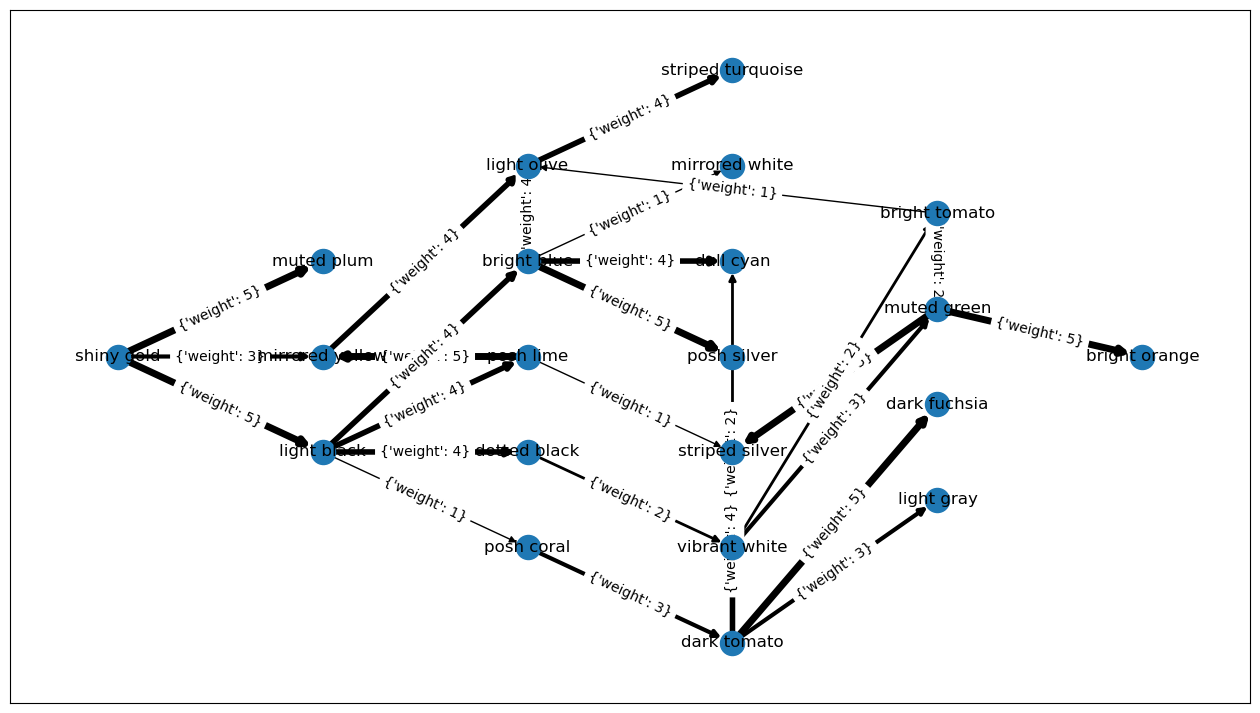

In [56]:
pos = nx.bfs_layout(sub_graph, target)

fig, ax = plt.subplots(figsize=(16,9))
nx.draw_networkx_nodes(sub_graph, pos, ax=ax)
nx.draw_networkx_labels(sub_graph, pos, ax=ax)
nx.draw_networkx_edges(sub_graph, pos, width=[sub_graph.get_edge_data(*x)['weight'] for x in sub_graph.edges] ,ax=ax)
nx.draw_networkx_edge_labels(sub_graph, pos,ax=ax)
plt.show()

In [16]:
def count_bag_contents(start):
    
    
    decendants = nx.descendants_at_distance(sub_graph, start, 1)
    
    if not decendants:
        return 1
    
    return sum(count_bag_contents(decendant) * sub_graph[start][decendant]['weight'] for decendant in decendants) + 1
        
    
    
    

In [17]:
count_bag_contents('shiny gold') - 1

6683

# Day 8

In [ ]:
raw_data = aoc.get_data(2020,8)

In [ ]:
data = raw_data.splitlines()

In [ ]:
class Console:
    
    
    def __init__(self):
        
        self.accumulator = 0
        self.pointer = 0
        self.instructions = set()
        self.data = None
        
        
    def run(self, data):
    
        self.accumulator = 0
        self.pointer = 0
        self.instructions = set()
        self.data = data
        
        while self.pointer not in self.instructions:
            
            self.next_instruction()
            
        return self.accumulator
    
    
    
    def next_instruction(self):
        
        self.instructions.add(self.pointer)
        
        instruction, value = self.data[self.pointer].split(' ')
        
        match instruction:
            
            case 'nop':
                
                self.pointer += 1
                
            case 'acc':
                self.accumulator += int(value)
                self.pointer += 1
                
            case 'jmp':
                self.pointer += int(value)
        

In [ ]:
console = Console()

In [ ]:
console.run(data)

In [ ]:
def make_new_tape(tape):
    
    for i in range(len(tape)):
                       
        verb = tape[i]
        new_tape = tape.copy()
        
        
        if 'nop' in verb:
        
            new_tape[i] = verb.replace('nop', 'jmp')
            
            
            
        elif 'jmp' in verb:
            
            new_tape[i] = verb.replace('jmp', 'nop')
            
                      
        yield new_tape.copy()
    

In [ ]:
a = make_new_tape(data)

In [ ]:
for tape in make_new_tape(data):
    
    try:
        console.run(tape)
    except IndexError:
        print(console.accumulator)

# Day 9

In [ ]:
raw_data = aoc.get_data(2020,9)

In [ ]:
data = list(map(int, raw_data.splitlines()))

In [ ]:
list(map(sum, itertools.permutations(data[0:25],2)))

In [ ]:
def find_invalid_number(data):
    
    preamble = data[0:25]
    
    check_values = data[25:]
    
    
    for value in check_values:
        
        if value not in list(map(sum, itertools.permutations(preamble,2))):
        
            return value
        
        preamble.pop(0)
        preamble.append(value)
        

In [ ]:
find_invalid_number(data)

In [ ]:
def find_invalid_number_with_preamble(data):
    
    preamble = data[0:25]
    
    check_values = data[25:]
    
    
    for value in check_values:
        
        if value not in list(map(sum, itertools.permutations(preamble,2))):
        
            return value, preamble
        
        preamble.pop(0)
        preamble.append(value)

In [ ]:
value, preamble = find_invalid_number_with_preamble(data)

In [ ]:
def sliding_window(data, window_size):
    
    
    for i in range(len(data) - window_size + 1):
        
        yield data[i:i+window_size]

In [ ]:
list(sliding_window(preamble, 3))

In [ ]:
def find_values_in_preamble(value, preamble):
    
    for window_size in range(3, len(preamble)+1):
                        
        for window in sliding_window(preamble, window_size):
            
            print(sum(window))
            
            if sum(window) == value:
                
                return min(window) + max(window)
    

In [ ]:
find_values_in_preamble(value, preamble)

# Day 10

In [ ]:
raw_data = aoc.get_data(2020, 10)

In [ ]:
data = list(map(int, raw_data.splitlines()))

In [ ]:
max(data)

In [ ]:
adaptor_joltage = max(data) + 3

In [ ]:
joltages = [0] + sorted(data) + [adaptor_joltage]

In [ ]:
joltages

In [ ]:
def diff_1(value):
    
    return value[1] - value[0] == 1


def diff_3(value):
    
    return value[1] - value[0] == 3


In [ ]:
sum(map(diff_1, aoc.sliding_window(joltages, 2))) * sum(map(diff_3, aoc.sliding_window(joltages, 2)))

In [ ]:
sum(map(diff_1, aoc.sliding_window(joltages, 2)))

# Day 11

In [ ]:
raw_data = aoc.get_data(2020, 11)

In [ ]:
raw_data.splitlines()

In [ ]:
data = np.array([[y for y in x ] for x in raw_data.splitlines()])

In [ ]:
data

In [ ]:
def fill_seat_rule(seat):
    
    # seat will be filled if it is empty already and no neigbhors
    
    return '#' not in seat and seat[1,1] != '.'

In [ ]:
def vacate_seat_rule(seat):

    filled = seat[1,1] == '#'
    
    surrounding = (seat == "#").sum() > 4

    return filled and surrounding
    
    

In [ ]:
def get_seat(seats, row, col):
    
    return seats[row - 1: row+2, col-1:col+2]

In [ ]:
def next_turn(seats_grid):
    
    pad = np.pad(seats_grid, 1, constant_values='.')
    
    update = seats_grid.copy()
    
    for row in range(seats.shape[0]):
        
        for col in range(seats.shape[1]):
            
            seat = get_seat(pad, row+1, col+1)

            
            if fill_seat_rule(seat):
                
                update[row, col] = '#'
    
            elif vacate_seat_rule(seat):
                update[row, col] = 'L'
                
                
    return update

In [ ]:
first = data
second = next_turn(data)


while not np.array_equal(first, second):
    
    first, second = second, next_turn(second) 
    

In [ ]:
(first == '#').sum()

In [ ]:
(test == "#").sum() > 4

In [ ]:
test

In [ ]:
def get_raycast_seat(seats, row, col):
    
    
    

# Day 12

In [218]:
raw_data = aoc.get_data(2020, 12)

In [219]:
data = raw_data.splitlines()

In [220]:
NORTH = np.array([0,1], dtype=float)
EAST = np.array([1,0], dtype=float)

In [221]:
class Boat:
    
    def __init__(self):
        
        self.position = np.array([0,0], dtype=float)
        self.heading = 90

    def distance_traveled(self):
        return int(np.abs(self.position).sum())
    
    def process_instructions(self, instructions):
        
        self.__init__()
        
        for instruction in instructions:
            
            self.process_instruction(instruction)
            
        return self.distance_traveled()

    @staticmethod
    def split_instruction(instruction):
        direction = instruction[0]
        
        value = int(instruction[1:])
        return direction, value
    
    def process_instruction(self, instruction):
        
        direction, value = self.split_instruction(instruction)
        
        match direction:
            
            case 'N':
                self.position += NORTH * value
                
            case 'S':
                self.position -= NORTH * value
                
            case 'E':
                self.position += EAST * value
                
            case 'W':
                self.position -= EAST * value
                
            case "R":
                self.heading += value
                
            case "L":
                self.heading -= value

            case "F":
                self.position += self.rotate_vector(self.heading % 360, NORTH) * value

    @staticmethod
    def rotate_vector(angle, vector):
        
        theta = np.radians(angle)
        cos, sin = np.cos(theta), np.sin(theta)
        rotation_matrix = np.array([[cos, -sin], [sin, cos]])
        
        return np.dot(rotation_matrix, vector)

In [222]:
boat = Boat()
boat.process_instructions(data)

845

In [225]:
class WaypointBoat(Boat):
    
    def __init__(self):
        
        self.position = np.array([0,0], dtype=float)
        self.waypoint = np.array([10, 1], dtype=float)
        
    def process_instruction(self, instruction):
        
        direction, value = self.split_instruction(instruction)
        
        match direction:
            
            case 'N':
                self.waypoint += NORTH * value
                
            case 'S':
                self.waypoint -= NORTH * value
                
            case 'E':
                self.waypoint += EAST * value
                
            case 'W':
                self.waypoint -= EAST * value
                
            case "R":
                self.waypoint = self.rotate_vector(value * -1.0, self.waypoint)
                
            case "L":
                self.waypoint = self.rotate_vector(value , self.waypoint)
                
            case "F":
                self.position += self.waypoint * value

In [226]:
boat = WaypointBoat()
boat.process_instructions(data)

27016

# DAY 13

In [2]:
raw_data = aoc.get_data(2020, 13)

In [3]:
timestamp, schedule = raw_data.splitlines()

In [38]:
class Bus:
    
    def __init__(self, id):
        self.id = id
        
        
    def get_next_arrival_after_timestamp(self, timestamp):
            
        return self.id - (timestamp % self.id)
        
    def __repr__(self):
        return f'{self.id}'

In [53]:
class Scheduler:
    
    def __init__(self, schedule):
        
        ids = [int(x) for x in schedule.split(',') if x != 'x']
        
        self.buses = [Bus(id) for id in ids]
        
    def get_next_bus(self, timestamp):
        
        delta_arrival_times = [bus.get_next_arrival_after_timestamp(timestamp) for bus in self.buses]
        
        min_wait_time = min(delta_arrival_times)
        
        bus = self.buses[delta_arrival_times.index(min_wait_time)]
        
        return min_wait_time * bus.id

In [54]:
scheduler = Scheduler('7,13,x,x,59,x,31,19')

In [55]:
scheduler.get_next_bus(939)

295

In [56]:
scheduler = Scheduler(schedule)

In [57]:
scheduler.get_next_bus(int(timestamp))

2298

In [48]:
bus = Bus(7)

In [49]:
bus.get_next_arrival_after_timestamp(9)

5

In [153]:
class TimeStampScheduler:
    
    def __init__(self, schedule):
        
        schedule = schedule.split(',')
        
        self.buses = [int(x) for x in schedule if x != 'x']

        self.departures = [i for i, element in enumerate(schedule) if element !='x']
        
        
    def get_timestamp(self):
        
        
        return reduce(lambda a,b: a*b, self.buses) - chinese_remainder(self.buses, self.departures)
        
    
    
    def chinese_remainder(n, a):
        
        sums = 0
        
        prod = reduce(lambda a, b: a*b, n)
        
        for n_i, a_i in zip(n, a):
        
            p = prod // n_i

            sums += a_i * self.mul_inv(p, n_i) * p
        
        return sums % prod

    def mul_inv(a, b):
        
        b0 = b
        
        x0, x1 = 0, 1
        
        if b == 1: return 1
        
        while a > 1:
        
            q = a // b
            
            a, b = b, a%b
            
            x0, x1 = x1 - q * x0, x0
        
        if x1 < 0: x1 += b0
        
        return x1        

In [160]:
scheduler = TimeStampScheduler(schedule)

In [161]:
scheduler.get_timestamp()

783685719679632

# Day 14

In [3]:
raw_data = aoc.get_data(2020, 14)

In [4]:
data = raw_data.splitlines()

In [5]:
class BitComputer:
    
    def __init__(self):
        
        self.memory = dict()
        self.bitmask = None
        
        
    def process_instructions(self, instructions):
        
        for instruction in instructions:
            
            self.process_instruction(instruction)
            
    def process_instruction(self, instruction):
        
        instruction = instruction.split(' = ')
        
        
        if 'mask' in instruction[0]:
            
            self.bitmask = instruction[1]
            
        else:
            
            memory_location = int(re.search(r'\d+', instruction[0])[0])
            
            self.memory[memory_location] = self.apply_mask(instruction[1])
            
    def apply_mask(self, number):
        bit_representation = "{0:b}".format(int(number)).zfill(36)
        
        output_string =''
        
        for value, mask in zip(bit_representation, self.bitmask):
            
            if mask == 'X':
                output_string += value
                
            else:
                output_string += mask
                
        return int(output_string,2)

    def get_mem(self):
        return sum(self.memory.values())

In [6]:
computer = BitComputer()

In [7]:
computer.process_instructions(data)

In [8]:
computer.get_mem()

15018100062885

In [15]:
class BitComputerV2(BitComputer):
    
    
    def __init__(self):
        super().__init__()
        self.value = None
    
    def process_instruction(self, instruction):
        
        instruction = instruction.split(' = ')
        
        
        if 'mask' in instruction[0]:
            
            self.bitmask = instruction[1]
            
        else:
            self.value = int(instruction[1])
            self.get_memory_locations(int(re.search(r'\d+', instruction[0])[0]))

     
    def get_memory_locations(self, number):
        
        bit_representation = "{0:b}".format(int(number)).zfill(36)
        
        floating_memory_locations = ''
        
        for value, mask in zip(bit_representation, self.bitmask):
            
            
            if mask == '0':
                floating_memory_locations += value
                
            elif mask == '1':
            
                floating_memory_locations += '1'
                
            else:
                
                floating_memory_locations += 'X'
                
                
        self.fill_floating_bit(floating_memory_locations)
                
    def fill_floating_bit(self, mem_location):
                
        if 'X' not in mem_location:
            
            self.memory[int(mem_location, 2)] = self.value
        
        else:
            
            self.fill_floating_bit(mem_location.replace('X', '1', 1)), self.fill_floating_bit(mem_location.replace('X', '0', 1))
        

            
        

In [16]:
computer = BitComputerV2()

In [17]:
computer.process_instructions(data)

In [75]:
computer.get_mem()

5724245857696

# Day 15

In [4]:
raw_data = aoc.get_data(2020, 15)

In [5]:
raw_data.strip().split(',')

['1', '20', '11', '6', '12', '0']

In [54]:
class SpokenWord:
    
    def __init__(self, word, turn_spoken):
        
        self.word = word
        self.turn_spoken = turn_spoken
        self.turn_spoken_before = None
        
    def __repr__(self):
        
        return f'word {self.word} : turn {self.turn_spoken} : spoken before {self.turn_spoken_before}'
    
    def __eq__(self, other):
        return self.word == other.word


class Game:
    
    
    def __init__(self, initial_numbers):
        
        self.spoken_words = [SpokenWord(int(x), i + 1) for i, x in enumerate(initial_numbers.strip().split(','))]
        self.turn = len(self.spoken_words) + 1

        
        
    def play(self, stop):
        
        while self.turn <= stop:
            
            self.play_turn()
            self.turn += 1

            
    def play_turn(self):
        
        last_spoken_word = self.spoken_words[-1]
        
        self.say_next_word(last_spoken_word)
        
    def say_next_word(self, last_spoken_word):
        
        if last_spoken_word.turn_spoken_before:
            
            speak_word = SpokenWord(last_spoken_word.turn_spoken-last_spoken_word.turn_spoken_before, self.turn)
            
        else:
            
            speak_word = SpokenWord(0, self.turn)
            
    
            
        if speak_word in self.spoken_words:
            
            previous_time_spoken = self.spoken_words.pop(self.spoken_words.index(speak_word))
            
            speak_word.turn_spoken_before = previous_time_spoken.turn_spoken
        
        self.spoken_words.append(speak_word)
        
    def get_last_word_spoken(self):
        print(self.spoken_words[-1])

In [55]:
game = Game(raw_data)

In [56]:
game.play(2020)

In [57]:
game.get_last_word_spoken()

word 1085 : turn 2020 : spoken before None


In [74]:
class FastGame(Game):
    
    def __init__(self, initial_numbers):
        
        self.last_spoken_word = None
        self.last_turn_word_spoken = dict()
        self.turn_before_last_turn_word_spoken = dict()
        self.turn = 1
        
        for word in initial_numbers.strip().split(','):
            
            self.last_spoken_word = int(word)
            self.last_turn_word_spoken[self.last_spoken_word] = self.turn
            
            self.turn += 1
        
    def play_turn(self):
        
        last_turn_spoken = self.last_turn_word_spoken.get(self.last_spoken_word)
        turn_before_last_turn_spoken = self.turn_before_last_turn_word_spoken.get(self.last_spoken_word)
        
        if last_turn_spoken and turn_before_last_turn_spoken:
            
            self.say_word(last_turn_spoken - turn_before_last_turn_spoken)
            
        else:
            
            self.say_word(0)
            
        
    def say_word(self, word):
        
        self.last_spoken_word = word
        
        last_turn_spoken = self.last_turn_word_spoken.get(word)
        
        self.turn_before_last_turn_word_spoken[word] = last_turn_spoken
        self.last_turn_word_spoken[word] = self.turn
        
    
    def get_last_word_spoken(self):
        print(self.last_spoken_word)

In [75]:
game = FastGame(raw_data)

In [76]:
game.play(30000000)
game.get_last_word_spoken()

10652


# Day 16

In [2]:
raw_data = aoc.get_data(2020, 16)

In [77]:
class TicketValidator():
    
    def __init__(self, rules):
        
        self.rules = [Rule(x) for x in rules]
            

    def check_ticket(self, ticket):

        bad_values = list()
        
        for value in ticket.split(','):
        
            value = int(value)
            
            if all([x.check_bad(value) for x in self.rules]):
                bad_values.append(value)
                       
        return sum(bad_values)
    

    def check_tickets(self, tickets):
        
        return sum([self.check_ticket(ticket) for ticket in tickets])
        
    
class Rule:
    
    def __init__(self, rule_string):
        
        name, rule_values = rule_string.split(': ')
        
        self.name = name
        
        first_range, second_range = rule_values.split(' or ')
        
        self.values = self.create_range(first_range) + self.create_range(second_range)
        
        self.column = set()
        
    def create_range(self, range_string):
        
        first, last = range_string.split('-')
        
        return list(range(int(first), int(last) + 1))
        
        
    def check_bad(self, value):
        
        return not value in self.values
        
    def __repr__(self):
        return f'{self.name}'

In [5]:
validator = TicketValidator("""class: 1-3 or 5-7
row: 6-11 or 33-44
seat: 13-40 or 45-50""".splitlines())

In [6]:
validator.check_tickets("""7,3,47
40,4,50
55,2,20
38,6,12""".splitlines())

71

In [104]:
rules, my_ticket, other_tickets = raw_data.split('\n\n')

In [8]:
validator = TicketValidator(rules.splitlines())

In [9]:
validator.check_tickets(other_tickets.splitlines()[1:])

25984

In [157]:
class TicketPropertyFinder(TicketValidator):
    
    def __init__(self, rules):
        
        super().__init__(rules)
        self.valid_tickets = None
    
    @property
    def departure_rules(self):
    
        return [x for x in self.rules if 'departure' in x.name]
    
    def sort_rules(self, ticket):
        
        check = map(int, ticket.split(","))
        
        for i, value in enumerate(check):
            
            column = self.get_column(i)
            
            for rule in self.rules:
                
                rule_applied = [not rule.check_bad(x) for x in column]
            
                if all(rule_applied):
                    rule.column.add(i)
    
        self.rules = sorted(self.rules, key=lambda x: x.column)
        
        
    def reduce_rules(self):
        
        for i, rule in enumerate(self.rules[:-1]):
            
            value = next(iter(rule.column))
            
            rule.column = value
            
            for other_rule in self.rules[i+1:]:
                
                other_rule.column.remove(value)
            
        last_rule = self.rules[-1]
        
        last_rule.column = next(iter(last_rule.column))
                
            
            
    def score_ticket(self, ticket):
        
        
        values = list(map(int, ticket.split(',')))
        
        self.sort_rules(ticket)
        self.reduce_rules()
        
        
        return reduce(lambda a,b: a*b, [values[rule.column] for rule in self.departure_rules])
    
                    
    def get_column(self, i):
        
        
        return [x[i] for x in self.valid_tickets]
    
    
    def check_ticket(self, ticket):
        
        for value in ticket.split(','):
            
            value = int(value)
            
            if all([x.check_bad(value) for x in self.rules]):
                return
            
        return ticket
    
    def check_tickets(self, tickets):
        
        
        valid_tickets = list()
        
        for ticket in tickets:
        
            valid_ticket = self.check_ticket(ticket)
            
            if valid_ticket:
                
                valid_tickets.append(list(map(int, valid_ticket.split(','))))
        
        self.valid_tickets = valid_tickets
        

In [158]:
validator = TicketPropertyFinder(rules.splitlines())

In [159]:
validator.check_tickets(other_tickets.splitlines()[1:])

In [160]:
validator.score_ticket(my_ticket.splitlines()[1])

1265347500049

# Day 17

In [7]:
raw_data = aoc.get_data(2020, 17)

In [9]:
raw_data.splitlines()

['.#######',
 '#######.',
 '###.###.',
 '#....###',
 '.#..##..',
 '#.#.###.',
 '###..###',
 '.#.#.##.']

In [3]:
class Field:
    
    def __init__(self, input_field):
        
        width = len(input_field.splitlines()[0])
        height = len(input_field.splitlines())
        
        values = np.fromstring(','.join(input_field.replace('\n', '')).replace('.', '0').replace('#', '1'), sep=',', dtype=int).reshape((width,height))
        
        self.image = np.zeros((width, height, 1), dtype=int)
        self.image[:,:, 0] = values
        self.kernel = np.ones((3,3,3), dtype=int)
        self.kernel[1,1,1] = 0

    def step(self):
        
        self.image = np.pad(self.image, 1, mode='constant', constant_values=0)
        
        convolution = convolve(self.image, self.kernel)
        
        three_neigbhors = convolution == 3
        two_neigbhors = convolution == 2
        
        remain_lit = (three_neigbhors + two_neigbhors) & (self.image == 1)
        light_up = three_neigbhors & (self.image == 0)
        
        self.image = np.zeros(self.image.shape, dtype=int) + remain_lit + light_up
        
    def simulate(self, steps=6):
        
        for i in range(steps):
            self.step()
    
    def count_lit(self):
        return self.image.sum()

In [4]:
field = Field(raw_data)
field.simulate(6)
field.count_lit()

395

In [5]:
class Tesseract(Field):
    
    def __init__(self, input_field):

        width = len(input_field.splitlines()[0])
        height = len(input_field.splitlines())
        
        values = np.fromstring(','.join(input_field.replace('\n', '')).replace('.', '0').replace('#', '1'), sep=',', dtype=int).reshape((width,height))
        
        self.image = np.zeros((width, height, 1, 1), dtype=int)
        self.image[:,:, 0, 0] = values
        self.kernel = np.ones((3,3,3,3), dtype=int)
        self.kernel[1,1,1,1] = 0

In [6]:
tesseract = Tesseract(raw_data)
tesseract.simulate(6)
tesseract.count_lit()

2296

# Day 18

In [2]:
raw_data = aoc.get_data(2020, 18)

In [94]:
class EqualEvaluator:

    def split_equation(self, equation):
        
        return re.findall('[0-9+*]+|[()]', equation)
        
    def gobble(self, equation):
        
        if equation[0] in '+*()':
            return equation
        
        values = re.findall('\d+|[*+]', equation)
        
        while len(values) > 2:
           
            left = values.pop(0)
            operator = values.pop(0)
            right = values.pop(0)
            
            evaluation = eval(f"{left}{operator}{right}")
            
            values.insert(0, f"{evaluation}")
        
        return ''.join(values)
            
    def reduce_equation(self, equation):
        
        equation = equation.replace(" ", "")
        
        while not re.match('^\d+$', equation):
            
            split = self.split_equation(equation)
            
            equation = ''.join(map(self.gobble, split))
            
            equation = re.sub('\((\d+)\)', lambda match: match.group(1), equation)
            
        return int(equation)
    
    def evaluate(self, equations):
        return sum(map(self.reduce_equation, equations))

In [95]:
evaluator = EqualEvaluator()
evaluator.evaluate(raw_data.splitlines())

1408133923393

In [96]:
class AdditionFirstEvaluator(EqualEvaluator):

    def wrap_addition(self, equation):
        return re.sub('(\d+\+\d+)', lambda match: f"({match.group(1)})", equation)
    
    def reduce_equation(self, equation):
        
        equation = equation.replace(" ", '')
        
        while not re.match('^\d+$', equation):
            
            equation = self.wrap_addition(equation)
            
            split = self.split_equation(equation)
            
            equation = ''.join(map(self.gobble, split))
            
            equation = re.sub('\((\d+)\)', lambda match: match.group(1), equation)
            
        return int(equation)
            
    def gobble(self, equation):
        
        if equation[-1] in '+*':
            return equation
        
        return super().gobble(equation)

        


In [97]:
evaluator = AdditionFirstEvaluator()
evaluator.evaluate(raw_data.splitlines())

314455761823725

# Day 19

In [2]:
raw_data = aoc.get_data(2020,19)

In [71]:
class MessageValidator:
    
    def __init__(self, text_rules):
        
        self.rules = dict()
        
        for rule in text_rules.splitlines():
            
            rule_index, rule_values = rule.split(':')
            
            self.rules[rule_index] = rule_values.strip().replace('"', '').split(' ')
            
        self.valid_strings = self.make_valid_strings()
    
    def make_valid_strings(self):
        
        return "^" + "".join(map(self.reduce_rule, self.rules['0'])) + "$"
        
        
    def reduce_rule(self, element):
        
        next_rule = self.rules.get(element)
        
        if next_rule is None:
            return element
        
        resolved = ''.join(map(self.reduce_rule, next_rule))
        
        if '|' in resolved:
            return '(?:' + resolved + ')'
        
        else: 
            return resolved
        
        
    def validate_message(self, message):
        
        match = re.match(self.valid_strings, message)
        
        if match:
            return True
        
        else:
            return False
        
    def count_valid_messages(self, messages):
        
        return sum(map(self.validate_message, messages.splitlines()))

In [132]:
validator = MessageValidator("""0: 4 1 5
1: 2 3 | 3 2
2: 4 4 | 5 5
3: 4 5 | 5 4
4: "a"
5: "b""")

In [133]:
validator.valid_strings

'a(?:(?:aa|bb)(?:ab|ba)|(?:ab|ba)(?:aa|bb))b$'

In [87]:
validator.count_valid_messages("""ababbb
bababa
abbbab
aaabbb
aaaabbb""")

2

In [88]:
rules, messages = raw_data.split('\n\n')

In [89]:
validator = MessageValidator(rules)

In [90]:
validator.valid_strings

'(?:(?:a(?:(?:b(?:a(?:(?:a(?:ba|ab)|b(?:bb|aa))b|(?:a(?:aa|b(?:a|b))|bba)a)|b(?:(?:bab|(?:a(?:a|b)|ba)a)b|(?:baa|(?:aa|ba)b)a))|a(?:(?:b(?:bab|(?:a(?:a|b)|ba)a)|a(?:(?:aa|b(?:a|b))a|(?:(?:a|b)(?:a|b))b))b|(?:(?:a(?:ab|aa)|b(?:ab|bb))a|(?:baa|bab)b)a))b|(?:a(?:a(?:(?:b(?:aa|ba))a|(?:b(?:a(?:a|b)|ba)|aaa)b)|b(?:b(?:a(?:aa|ba)|b(?:ba|ab))|a(?:bba|aaa)))|b(?:(?:a(?:(?:(?:a|b)(?:a|b))b|(?:bb|aa)a)|b(?:(?:a|b)(?:aa|ba)))b|(?:b(?:(?:ab|bb)b|(?:(?:a|b)(?:a|b))a)|a(?:bab|(?:a(?:a|b)|ba)a))a))a)|b(?:(?:a(?:(?:b(?:a(?:aa|b(?:a|b))|b(?:aa|(?:a|b)b))|a(?:aba|b(?:aa|(?:a|b)b)))a|(?:b(?:aba|b(?:aa|(?:a|b)b))|a(?:(?:a|b)(?:ab|bb)))b)|b(?:b(?:(?:a(?:aa|b(?:a|b))|b(?:aa|(?:a|b)b))b|(?:(?:aa|ba)b|(?:a(?:a|b)|ba)a)a)|a(?:b(?:b(?:aa|ba)|a(?:ba|bb))|a(?:b(?:a(?:a|b)|ba)|aaa))))a|(?:b(?:a(?:(?:a|b)(?:b(?:ab|bb)|aba))|b(?:a(?:aba|b(?:ab|aa))|b(?:(?:aa|ba)b)))|a(?:b(?:a(?:(?:ab|aa)b|(?:ba|bb)a)|b(?:b(?:bb|aa)))|a(?:(?:a(?:aa|b(?:a|b))|b(?:ab|bb))a|(?:b(?:aa|b(?:a|b))|a(?:ab|bb))b)))b)))(?:(?:a(?:(?:b(?:a(?:(?:

In [91]:
validator.count_valid_messages(messages)

182

# Day 20

In [92]:
raw_data = aoc.get_data(2020, 20)

In [125]:
class Picture:
    
    def __init__(self, data):
        self.tiles = [Tile(x) for x in data.strip().split('\n\n')]
        
        self.datum = self.tiles[0]
        
        self.datum.position = np.array([0,0])

    def sort_tiles(self):
        
        while self.unsorted():
            
            for unsorted_tile, sorted_tile in itertools.product(self.unsorted(), self.sorted()):
                
                top, bottom, left, right = sorted_tile.get_edges()
                
                
                
            
            
    def unsorted(self):
        return [x for x in self.tiles if not x.position]
    
    def sorted(self):
        return [x for x in self.tiles if x.position]
        
class Tile:
    
    def __init__(self, data):
        
        id, *image = data.splitlines()
        
        self.id = int(re.match('Tile (\d+):', id).group(1))
        
        image = '\n'.join(image)
        
        width = len(image.splitlines()[0])
        height = len(image.splitlines())
        
        self.image = np.fromstring(','.join(image.replace('\n', '')).replace('.', '0').replace('#', '1'), sep=',', dtype=int).reshape((width,height))
            
        self.position = None

    def get_edges(self):
        # top, bottom, left, right
        return self.image[0, :], self.image[-1, :], self.image[: , 0], self.image[: , -1]
        

    def rotate(self):
        self.image = np.rot90(self.image)

    def flip(self):
        
        self.image = np.flipud(self.image)

    def __repr__(self):
        return f"Tile {self.id}"
        
        

In [126]:
picture = Picture(raw_data)

In [127]:
picture.tiles[0].get_edges()

(array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1]),
 array([0, 1, 1, 1, 0, 1, 1, 1, 0, 0]),
 array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1]))

In [128]:
picture.tiles[0].image

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 0, 1, 1],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 1, 1, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 1]])

In [131]:
list(itertools.product('ab', ''))
    
    

[]

# Day 21

In [2]:
raw_data = aoc.get_data(2020, 21)

In [3]:
raw_data.splitlines()

['chsprq bdghf dtpcd djtblr kggl cvdvd jzlht lkdg nd szvsg drv ptn mhjg dnlsjr rhvglf fmgg prkpfnh tfdl bcthd lmxc hjpv rsvlb hgmq xsvjb cqgqxq vsvmt ccd sqdsxhb vpzhpnx dlj dvqsf mmr bmtn vgqd zfrn zffphr nlmsj xxhf rfdxph ggqlkpr cmfj bfkm stcctv rlnsc snngn xzb zjfb qdccb qxrm jlhv vfpmcdc gbnj srhmt lfrq blcb jcnglmz bhrjc qmvzln nllmj zqhxc xpk drchk pbhthx qks dgvqv tcph (contains fish, wheat, shellfish)',
 'cvdvd lkdg dgvqv czd mjnjq kxkzv bdghf xzb xsxkj bfjlcv sbkq gsmvb cvrzmd prspxdl pbhthx sqdsxhb ppfmb zffphr chmmqq htfvt ccd szd qks qthvbf prkpfnh xdlhgf rqhp fmgg mxqht mdpqq phh xrstpzc chxkn vgqd qmvzln prg vfpmcdc fsgj zgfr cqgqxq hfl csnfnl pcg ghrnk hmrh kdkrhr qldrh rsvlb lczvhs xsvjb qsndg rlnsc djtblr ffpq snngn zbs dvqsf qsvfk hmcc blgxsl (contains dairy)',
 'bmtn ptn pmvgd zffphr cfjqbs chmmqq prkpfnh jzlht mxqht xzb blgxsl pdzqrqq pbhthx vpzhpnx fmgg xpk prg mjnjq kggl mhjg mmr fmgnz msdgp dnlsjr zgcrp bdghf ctfdj dgvqv snngn ghrnk tfdqg hctzvvc ddbss xmnqb htf

In [117]:
class Detector:
    
    def __init__(self, foods):
        self.foods = list()
        self.allergens = dict()
        self.ingredients = set()
        
        for food in foods.splitlines():
            
            ingredients, allergens = food[:-1].split(' (contains ')
            
            self.foods.append(ingredients.split())
            
            for ingredient in ingredients.split():
                
                self.ingredients.add(ingredient)
            
            for allergen in allergens.split(', '):
                
                ingredient_list = self.allergens.get(allergen)
                
                if ingredient_list:
                    
                    ingredient_list.append({x for x in ingredients.split()})
                    
                else:
                    
                    self.allergens[allergen] = [{x for x in ingredients.split()}]
                    
        for allergen in self.allergens.keys():
            
            ingredients = self.allergens[allergen]
                
            self.allergens[allergen] = reduce(lambda x, y : x.intersection(y), ingredients)
            
        self.non_allergens = self.ingredients - set.union(*self.allergens.values())
        
    
    def count_not_allergic_ingredient(self):
        
        return sum(map(self.check_food, self.foods))
        
        
    def check_food(self, food):
        
        return sum([x in self.non_allergens for x in food])
                
                
    def reduce_allergens(self):
        
        unsolved = [x for x in self.allergens.values() if len(self.allergens[x]) > 1]
        
        while unsolved:
            
            solved = [x for x in self.allergens.values() if len(self.allergens[x]) == 1]
            
            for solved in solved:
                
            unsolved = [x for x in self.allergens.values() if len(self.allergens[x]) > 1]
                
            
                
    def sort_allergens(self):
        
        sorted_allergens = sorted(self.allergens.keys())
        
        return ','.join(sorted_allergens)
        

In [118]:
d = Detector(raw_data)

In [119]:
d.allergens

{'fish': {'dgvqv', 'dnlsjr'},
 'wheat': {'dgvqv', 'dnlsjr', 'rsvlb'},
 'shellfish': {'xzb'},
 'dairy': {'lkdg', 'pbhthx'},
 'soy': {'csnfnl', 'lkdg', 'rsvlb'},
 'eggs': {'sqdsxhb', 'xzb'},
 'sesame': {'dnlsjr', 'sqdsxhb'},
 'nuts': {'csnfnl', 'dnlsjr', 'rsvlb', 'sqdsxhb'}}

In [120]:
d.ingredients

{'bbztv',
 'bcthd',
 'bdghf',
 'bfjlcv',
 'bfkm',
 'bhpn',
 'bhrjc',
 'blcb',
 'blgxsl',
 'bmtn',
 'bplgpn',
 'bqdbr',
 'bsnvm',
 'ccd',
 'ccg',
 'cfjqbs',
 'cfkdn',
 'cfzcl',
 'chmmqq',
 'chsprq',
 'chxkn',
 'cmfj',
 'cpp',
 'cqgqxq',
 'csnfnl',
 'cspz',
 'ctfdj',
 'cvdvd',
 'cvrzmd',
 'czd',
 'dcmpb',
 'ddbss',
 'dgvqv',
 'djtblr',
 'dlj',
 'dnlsjr',
 'dptx',
 'drchk',
 'drv',
 'drvxr',
 'dsjrv',
 'dtpcd',
 'dvh',
 'dvqsf',
 'dxn',
 'dxqbf',
 'fbj',
 'ffpq',
 'fktqdh',
 'fmgg',
 'fmgnz',
 'fqpjl',
 'fsgj',
 'ftzgp',
 'gbnj',
 'gdg',
 'ggqlkpr',
 'ghrnk',
 'gjbfmm',
 'gsmvb',
 'hcgh',
 'hctzvvc',
 'hfl',
 'hgmq',
 'hhxrrr',
 'hjpv',
 'hmcc',
 'hmrh',
 'hnnk',
 'htfvt',
 'jcnglmz',
 'jfzd',
 'jgnxfn',
 'jlhv',
 'jsxqj',
 'jtl',
 'jzktf',
 'jzlht',
 'kbfqvxf',
 'kdkrhr',
 'kdtr',
 'kfl',
 'kggl',
 'kpbg',
 'ktgqdf',
 'kvtlklq',
 'kxkzv',
 'lcgdsp',
 'lcnnf',
 'lczvhs',
 'lfrq',
 'lkdg',
 'lmfccx',
 'lmxc',
 'lrgxlct',
 'lxfbmt',
 'lzbfz',
 'mbbz',
 'mdpqq',
 'mdrn',
 'mhjg',
 'mjnjq',
 

In [121]:
d.non_allergens

{'bbztv',
 'bcthd',
 'bdghf',
 'bfjlcv',
 'bfkm',
 'bhpn',
 'bhrjc',
 'blcb',
 'blgxsl',
 'bmtn',
 'bplgpn',
 'bqdbr',
 'bsnvm',
 'ccd',
 'ccg',
 'cfjqbs',
 'cfkdn',
 'cfzcl',
 'chmmqq',
 'chsprq',
 'chxkn',
 'cmfj',
 'cpp',
 'cqgqxq',
 'cspz',
 'ctfdj',
 'cvdvd',
 'cvrzmd',
 'czd',
 'dcmpb',
 'ddbss',
 'djtblr',
 'dlj',
 'dptx',
 'drchk',
 'drv',
 'drvxr',
 'dsjrv',
 'dtpcd',
 'dvh',
 'dvqsf',
 'dxn',
 'dxqbf',
 'fbj',
 'ffpq',
 'fktqdh',
 'fmgg',
 'fmgnz',
 'fqpjl',
 'fsgj',
 'ftzgp',
 'gbnj',
 'gdg',
 'ggqlkpr',
 'ghrnk',
 'gjbfmm',
 'gsmvb',
 'hcgh',
 'hctzvvc',
 'hfl',
 'hgmq',
 'hhxrrr',
 'hjpv',
 'hmcc',
 'hmrh',
 'hnnk',
 'htfvt',
 'jcnglmz',
 'jfzd',
 'jgnxfn',
 'jlhv',
 'jsxqj',
 'jtl',
 'jzktf',
 'jzlht',
 'kbfqvxf',
 'kdkrhr',
 'kdtr',
 'kfl',
 'kggl',
 'kpbg',
 'ktgqdf',
 'kvtlklq',
 'kxkzv',
 'lcgdsp',
 'lcnnf',
 'lczvhs',
 'lfrq',
 'lmfccx',
 'lmxc',
 'lrgxlct',
 'lxfbmt',
 'lzbfz',
 'mbbz',
 'mdpqq',
 'mdrn',
 'mhjg',
 'mjnjq',
 'mmr',
 'mpnd',
 'mppxj',
 'msdgp',
 'mxq

In [122]:
d.count_not_allergic_ingredient()

2826

In [123]:
d.allergens.values().sort(key=len)

AttributeError: 'dict_values' object has no attribute 'sort'

In [124]:
d.sort_allergens()

'dairy,eggs,fish,nuts,sesame,shellfish,soy,wheat'

In [125]:
d.allergens

{'fish': {'dgvqv', 'dnlsjr'},
 'wheat': {'dgvqv', 'dnlsjr', 'rsvlb'},
 'shellfish': {'xzb'},
 'dairy': {'lkdg', 'pbhthx'},
 'soy': {'csnfnl', 'lkdg', 'rsvlb'},
 'eggs': {'sqdsxhb', 'xzb'},
 'sesame': {'dnlsjr', 'sqdsxhb'},
 'nuts': {'csnfnl', 'dnlsjr', 'rsvlb', 'sqdsxhb'}}

# Day 22

In [2]:
raw_data = aoc.get_data(2020, 22)

In [3]:
class Player:
    
    def __init__(self, cards):
        
        self.deck = [int(x) for x in cards.splitlines()[1:]]
    
    def return_cards(self, cards):
        
        self.deck += sorted(cards)[::-1]
    
    def play(self):
        
        return self.deck.pop(0)
    
    def score(self):
        
        return sum([x * (i+1) for i, x in enumerate(self.deck[::-1])])
    
    def has_lost(self):
        
        return not bool(self.deck)


class Game:
    
    def __init__(self, data):
        
        p1_data, p2_data = data.split('\n\n')
        
        self.player_1 = Player(p1_data)
        
        self.player_2 = Player(p2_data)
        
    def play(self):
        
        while not self.player_1.has_lost() and not self.player_2.has_lost():
            
            self.play_round()
            
        if self.player_1.has_lost():
            
            return self.player_2.score()
        
        else:
        
            return self.player_1.score()
            
    def play_round(self):
         
        cards = [self.player_1.play(), self.player_2.play()]
        
        if cards[0] > cards[1]:
            
            self.player_1.return_cards(cards)
        
        else:
            
            self.player_2.return_cards(cards)
         

In [4]:
g = Game(raw_data)

In [5]:
g.play()

31629

In [16]:
class RecursivePlayer(Player):
    
    
    def __init__(self, cards):
        
        super().__init__(cards)

        self.observed = set()
        
    def has_seen_deck(self):
        
        return hash(tuple(self.deck)) in self.observed
    
    def play(self):
        
        card = super().play()
        
        self.observed.add(hash(tuple(self.deck)))
        
        return card, (len(self.deck) >= card)
    
    def get_sub_deck(self):
        
        return 'player\n' + '\n'.join(map(str, self.deck))


class RecursiveGame(Game):

    def __init__(self, data):
        
        p1_data, p2_data = data.split('\n\n')
        
        self.player_1 = RecursivePlayer(p1_data)
        self.player_2 = RecursivePlayer(p2_data)
        
        self.winner = None
        
    def play(self):
        
        while self.winner is None:
            
            if self.player_1.has_seen_deck() or self.player_2.has_seen_deck():
                
                self.winner = 'player_1'
                
                break
            
            cards1, recurse1 = self.player_1.play()
            cards2, recurse2 = self.player_2.play()
        
            cards = [cards1, cards2]
            
            if recurse1 and recurse2:
                
                sub_game = RecursiveGame(self.player_1.get_sub_deck() + '\n' + self.player_2.get_sub_deck())
            
                sub_game.play()
                
                winner = sub_game.winner
                    
            else:
        
                winner = 'player_1' if cards1 > cards2 else 'player_2'    

            self.player_1.return_cards(cards) if winner == 'player_1' else self.player_2.return_cards(cards)

            
            if self.player_1.has_lost():
                
                self.winner = 'player_2'
                
            elif self.player_2.has_lost():
                
                self.winner = 'player_1'
                
            
            
            
            

In [19]:
g = RecursiveGame(raw_data)

In [20]:
g.play()

In [21]:
g.winner

'player_1'

In [29]:
g.player_1.score()

9467

# Day 23

In [30]:
raw_data = aoc.get_data(2020, 23)

In [3]:
class CrabCups:
    
    
    def __init__(self, labels):
        
        self.cups = list(map(int, labels.strip()))
        self.current = self.cups[0]
        self.target = None
        self.cups_in_hand = None
    
    def play_rounds(self, rounds):
        
        for x in range(rounds):
            self.play_round()
    
    def play_round(self):
        
        self.pickup_cups()
        self.find_target()
        self.place_cups()
        self.move_current()
    
    def pickup_cups(self):
        
        current_index = self.cups.index(self.current)
        
        self.cups_in_hand = [self.cups[(current_index + x) % len(self.cups)] for x in range(1, 4)]
        
        for cup in self.cups_in_hand:
            
            self.cups.remove(cup)
            
    def find_target(self):
        
        max_value = max(self.cups)
        
        candidate_targets =  [(self.current - x) % (max_value + 1) for x in range(1, len(self.cups))]
        
        
        for candidate_target in candidate_targets:
            
            if candidate_target in self.cups:
                
                self.target = candidate_target
                
                break
                
                
    def place_cups(self):
        
        target_index = self.cups.index(self.target)
        
        for cup in self.cups_in_hand[::-1]:
            
            self.cups.insert(target_index + 1, cup)
    
    def move_current(self):
    
        self.current = self.cups[(self.cups.index(self.current) + 1) % len(self.cups)]
    
    
    def label(self):
        
        ones_location = self.cups.index(1)
        
        values = [self.cups[(ones_location + x) % len(self.cups)] for x in range(1, len(self.cups))]
        
        return ''.join(map(str, values))

In [4]:
c = CrabCups("368195742")

In [5]:
c.play_rounds(100)
c.label()

'95648732'

In [6]:
class RevisedCrabCups(CrabCups):
    
    def __init__(self, labels):
        
        super().__init__(labels)

        self.cups += list(range(max(self.cups), 100000))
        
        
    def score(self):
        
        ones_location = self.cups.index(1)
        
        return self.cups[(ones_location + 1) % len(self.cups)] * self.cups[(ones_location + 2) % len(self.cups)]  
        

In [7]:
c = RevisedCrabCups(raw_data)

In [10]:
%timeit
c.play_rounds(1000)

In [16]:
(7 * 10000000-1000)  / 3600 / 24

810.1736111111112

In [98]:
class LinkedCrabCups(CrabCups):
    
    def __init__(self, labels):
        
        labels = list(map(int, labels.strip()))
        
        self.current = labels[0]
        
        values = labels  + list(range(max(labels)+1, 1000000+1))
        
        self.cups = {x:y for x,y in zip(values, values[1:]+[None])}
        
        self.cups[values[-1]] = self.current
        
        self.target = None
        
        self.cups_in_hand = None
        
    def pickup_cups(self):
        
        self.cups_in_hand = [self.cups.get(self.current)]
        self.cups_in_hand.append(self.cups.get(self.cups_in_hand[0]))
        self.cups_in_hand.append(self.cups.get(self.cups_in_hand[1]))
        
        self.cups[self.current] = self.cups.get(self.cups_in_hand[2])
        
    def move_current(self):
        
        self.current = self.cups[self.current]
        
    def find_target(self):
        
        self.target = self.current - 1
        
        while self.target in self.cups_in_hand:
            
            self.target = self.target - 1
            
        if self.target < 1:
            
            self.target = max(self.cups.keys()) 
            
        
    def place_cups(self):
        
        target = self.cups[self.target]
        
        self.cups[self.target] = self.cups_in_hand[0]
        
        self.cups[self.cups_in_hand[-1]] = target
        

In [99]:
l = LinkedCrabCups("368195742")

In [100]:
l.play_rounds(10000000)

In [101]:
l.cups[1] * l.cups[l.cups[1]]

192515314252

# Day 24

In [2]:
raw_data = aoc.get_data(2020, 24)

In [16]:
class Floor:
    
    
    def __init__(self, list_of_coordinates):
        
        max_dimension = max(map(len, list_of_coordinates.splitlines()))
        
        self.offset = max_dimension // 2
        
        self.tiles = np.zeros((max_dimension, max_dimension, max_dimension), dtype=bool)
        
        for coordinates in list_of_coordinates.splitlines():
            
            self.flip_tile(coordinates)
        
        
    def flip_tile(self, coordinates):
    
        tile = np.array([self.offset] * 3, dtype=int)
        
        while coordinates:
            
            if coordinates[0] in ['e', 'w']:
                
                coordinate = coordinates[0]
                coordinates = coordinates[1:]
                
            else: 
                
                coordinate = coordinates[0:2]
                coordinates = coordinates[2:]
                
            tile += self.step(coordinate)

        
        self.tiles[tile[0], tile[1], tile[2]] = not self.tiles[tile[0], tile[1], tile[2]]    

    def step(self, coordinate):
    
        q = 0
        r = 0
        s = 0
            
        match coordinate:
                
                case 'e':
                    q += 1
                    s -= 1
                
                case 'w':
                    q -=1
                    s +=1
                
                case 'ne':
                    q += 1
                    r -= 1

                case 'nw':
                    s += 1
                    r -= 1
                
                case 'se':
                    s -= 1
                    r += 1
                
                case 'sw':
                    q -= 1
                    r += 1
            
        return np.array([q,r,s])
            
    def get_black_tiles(self):
        
        return self.tiles.sum()
            

In [17]:
f = Floor(raw_data)

In [18]:
f.get_black_tiles()

320

In [49]:
class SimulatedFloor(Floor):
    
    
    def __init__(self, list_of_coordinate):
        
        super().__init__(list_of_coordinate)
    
        self._valid_tiles = list()
        self.calculate_valid_tiles()
    
    def simulate_round(self):
        
        new_tiles = self.tiles.copy()
        
        for tile in self._valid_tiles:
            
            is_black = self.tiles[tile[0], tile[1], tile[2]]
            
            black_adjacent_tiles = sum(self.get_adjacent_values(tile))     
            
            if is_black: 
                
                if not black_adjacent_tiles == 1:
                    
                    new_tiles[tile[0], tile[1], tile[2]] = False    
                
            else:
                
                if black_adjacent_tiles == 2:
                    
                    new_tiles[tile[0], tile[1], tile[2]] = True
                    
        
        self.tiles = new_tiles
            
    def simulate(self, rounds):
        
        for round in range(rounds):
            self.simulate_round()
            print(self.get_black_tiles())
                
                
    def calculate_valid_tiles(self):
                            
        for q,r,s in itertools.product(range(self.offset * 2), range(self.offset * 2), range(self.offset * 2)):
            
            if self.valid_tile_coordinate(q,r,s):
                tile = np.array([q,r,s])
                
                try: 
                    self.get_adjacent_values(tile)
                    self._valid_tiles.append(tile)
                except IndexError:
                    ...

    
    def valid_tile_coordinate(self, q,r,s):
        
        return q + r + s - (self.offset * 3) == 0
    
    
    def get_adjacent_values(self, tile):
        
        adjacent_tiles = [tile + self.step(x) for x in ['e', 'w', 'ne', 'nw', 'se', 'sw']]
        
        return [self.tiles[x[0], x[1], x[2]] for x in adjacent_tiles]

In [52]:
s = SimulatedFloor('''sesenwnenenewseeswwswswwnenewsewsw
neeenesenwnwwswnenewnwwsewnenwseswesw
seswneswswsenwwnwse
nwnwneseeswswnenewneswwnewseswneseene
swweswneswnenwsewnwneneseenw
eesenwseswswnenwswnwnwsewwnwsene
sewnenenenesenwsewnenwwwse
wenwwweseeeweswwwnwwe
wsweesenenewnwwnwsenewsenwwsesesenwne
neeswseenwwswnwswswnw
nenwswwsewswnenenewsenwsenwnesesenew
enewnwewneswsewnwswenweswnenwsenwsw
sweneswneswneneenwnewenewwneswswnese
swwesenesewenwneswnwwneseswwne
enesenwswwswneneswsenwnewswseenwsese
wnwnesenesenenwwnenwsewesewsesesew
nenewswnwewswnenesenwnesewesw
eneswnwswnwsenenwnwnwwseeswneewsenese
neswnwewnwnwseenwseesewsenwsweewe
wseweeenwnesenwwwswnew''')

# Day 25

In [16]:
raw_data = aoc.get_data(2020, 25)

In [17]:
def find_public_key(subject_number, loop_size):
    
    value = 1
    
    for i in range(loop_size):
        
        value *= subject_number
        value %= 20201227
        
    return value

    

In [30]:
def break_public_key(public_key):
    
    i = 0
    
    value = 1
    
    while not value == public_key:
        i += 1
        
        value *=7
        value %= 20201227
        
    return i
    
    
    

In [12]:
door, key = map(int, raw_data.splitlines())

In [35]:
find_public_key(key, break_public_key(door))

12181021